In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read the CSV file
data = pd.read_csv('../Titanic-Dataset.csv')

In [6]:
# Display the first few rows
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
# Step 1: Data Cleaning
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
# Impute missing values in 'Age' with median
data['Age'].fillna(data['Age'].median(), inplace=True)

C:\Users\jkkar\AppData\Local\Temp\ipykernel_11332\1971750813.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [9]:
# Fill missing 'Cabin' values with 'Unknown'
data['Cabin'].fillna('Unknown', inplace=True)

C:\Users\jkkar\AppData\Local\Temp\ipykernel_11332\3469138674.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cabin'].fillna('Unknown', inplace=True)


In [10]:
# Drop rows with missing 'Embarked' values
data.dropna(subset=['Embarked'], inplace=True)

In [11]:
# Step 2: Summary Statistics
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.315152    0.524184   
std     256.998173    0.486260    0.834700   12.984932    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.000000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


C:\Users\jkkar\AppData\Local\Temp\ipykernel_11332\897121822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Survived", palette="viridis")


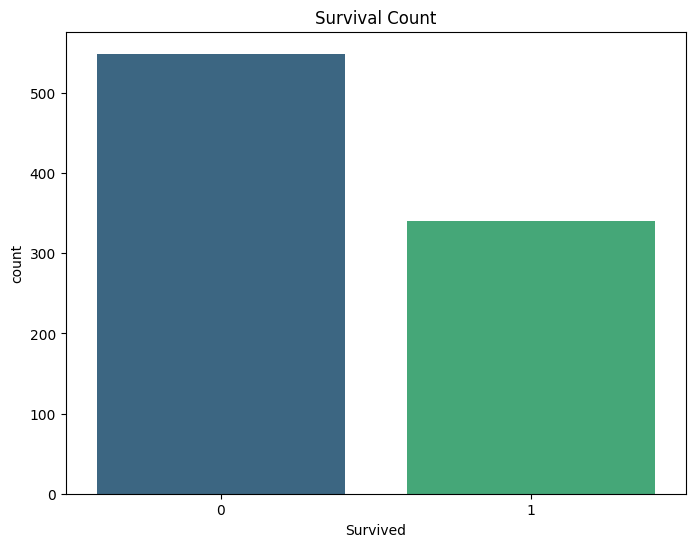

In [19]:
# Step 3: Exploratory Data Analysis
# Survival count
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Survived", palette="viridis")
plt.title("Survival Count")
plt.show()

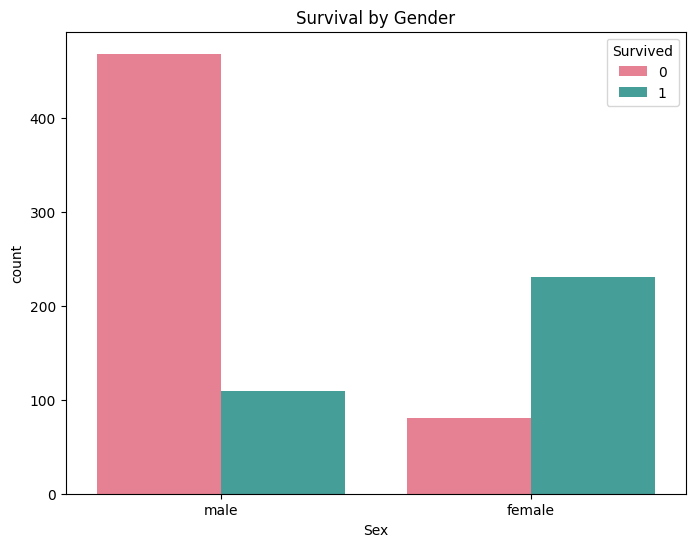

In [13]:
# Survival by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Sex", hue="Survived", palette="husl")
plt.title("Survival by Gender")
plt.show()

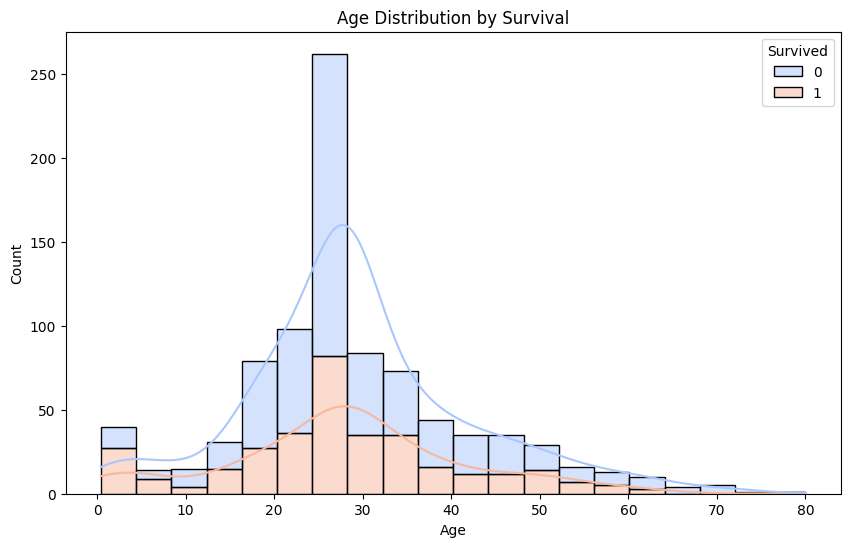

In [14]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Age", bins=20, kde=True, hue="Survived", multiple="stack", palette="coolwarm")
plt.title("Age Distribution by Survival")
plt.show()

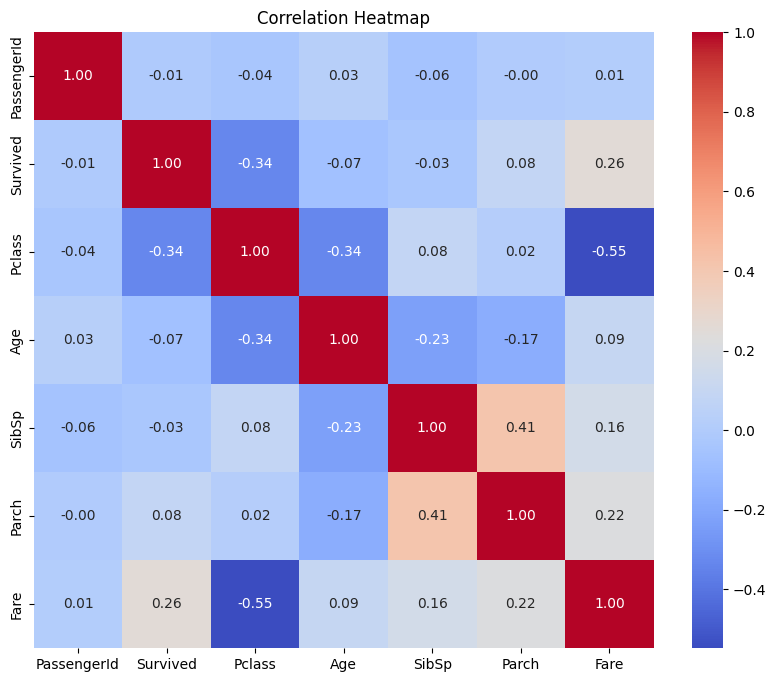

In [16]:
# Selecting only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


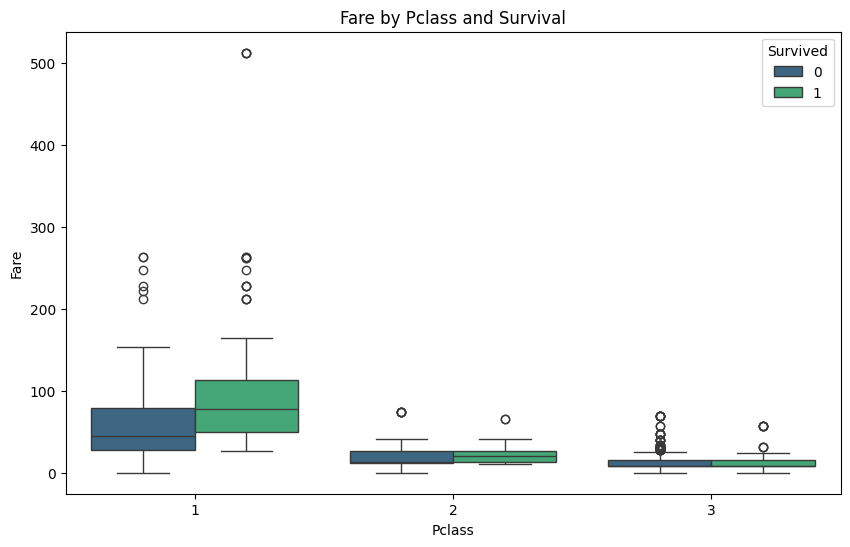

In [17]:

# Step 4: Feature Analysis
# Fare distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Pclass", y="Fare", hue="Survived", palette="viridis")
plt.title("Fare by Pclass and Survival")
plt.show()